C:\Users\tapir\AppData\Local\Temp\ipykernel_10140\4066272759.py:54: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(myquery,sql_connect)


   year  offlineorders  onlineorders  offline_grow_rate  online_grow_rate
0  2011            406          1201                NaN               NaN
1  2012           1172          2743              288.0             228.0
2  2013           1598         12584              136.0             458.0
3  2014            630         11131               39.0              88.0


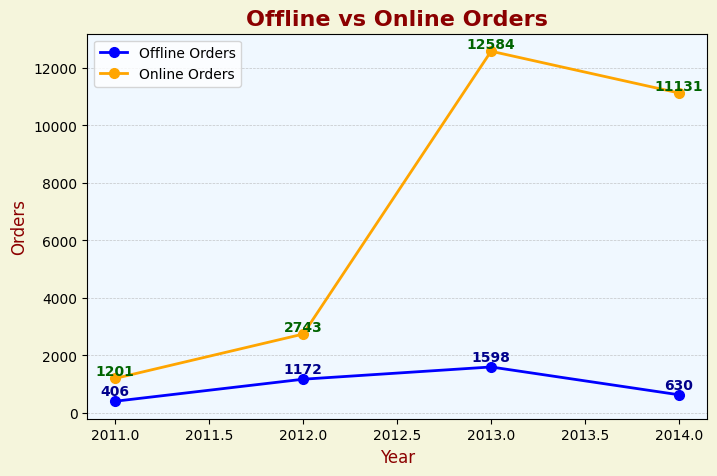

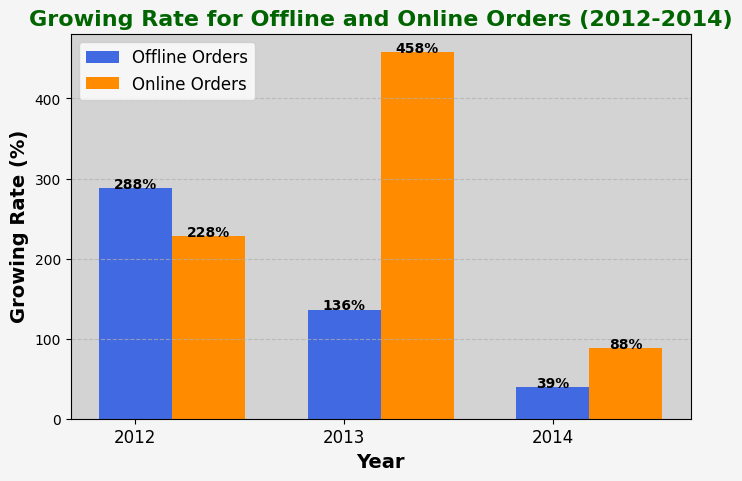

In [ ]:
import pyodbc  # Importing a library that connects and executes SQL queries
import pandas as pd  # Importing Pandas for data manipulation
import matplotlib.pyplot as plt  # Importing Matplotlib for data visualization

# Connect to the SQL Server database using pyodbc
sql_connect = pyodbc.connect(
    "DRIVER={SQL Server};"
    "SERVER=AVIPC\\SQLEXPRESS;"
    "DATABASE=AdventureWorks2019;"
    "Trusted_Connection=yes;")

# SQL query to retrieve data for the graph
myquery = """ 
---create view offline_online_orders_2011_to_2014 as

--SELECT 
    --YEAR(orderdate) AS year,
    --COUNT(CASE WHEN OnlineOrderFlag = 0 THEN 'online' END) AS offlineorders,
    --COUNT(CASE WHEN OnlineOrderFlag = 1 THEN 'ofline' END) AS onlineorders
--FROM AdventureWorks2019.Sales.SalesOrderHeader
--GROUP BY YEAR(orderdate);

--Here im creating view, that counts the orders type(online/offline) for each year.

--The case says: when the onlineorderflag = 0 , then call all the records as 'online' and count 
--number of the records for each year.

--order by is not allowed in views, so i use hum in the next chapter.
WITH firsttable AS (
    SELECT 
        year,
        offlineorders,
        onlineorders,
        LAG(offlineorders, 1, 0) OVER (ORDER BY year) AS previous_offline_count,
        LAG(onlineorders, 1, 0) OVER (ORDER BY year) AS previous_online_count
    FROM offline_online_orders_2011_to_2014
)
SELECT 
    year,
    offlineorders,
    onlineorders,
    CASE
        WHEN previous_offline_count = 0 THEN NULL 
        ELSE offlineorders * 100 / previous_offline_count END AS offline_grow_rate,

    CASE 
        WHEN previous_online_count = 0 THEN NULL 
        ELSE onlineorders * 100 / previous_online_count END AS online_grow_rate

FROM firsttable;
"""

# Creating a DataFrame from the SQL query result
df = pd.read_sql(myquery,sql_connect)
print(df)
 
#Figure creation
fig, ax = plt.subplots(figsize=(8, 5))

# Line graphs creation for offline and online orders
plt.plot(df['year'], df['offlineorders'], marker='o', linestyle='-', color='blue', linewidth=2, markersize=7, label="Offline Orders")
plt.plot(df['year'], df['onlineorders'], marker='o', linestyle='-', color='orange' ,linewidth=2, markersize=7, label="Online Orders")

#  Title design
plt.title('Offline vs Online Orders', fontsize=16, fontweight='bold', color="darkred")

# Axes design
plt.xlabel('Year', fontsize=12, color='darkred')
plt.ylabel('Orders', fontsize=12, color='darkred')

 # Adding gridlines to the y-axis
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

#  Adding values above each dot using for loop
for i in range(len(df)):
    plt.text(df['year'][i], df['offlineorders'][i] + 200, str(df['offlineorders'][i]), ha='center', fontsize=10, fontweight='bold', color='darkblue')
    plt.text(df['year'][i], df['onlineorders'][i] + 100, str(df['onlineorders'][i]), ha='center', fontsize=10, fontweight='bold', color='darkgreen')

# # Adding background colors
ax.set_facecolor("aliceblue")
fig.set_facecolor("beige")

plt.legend()
plt.show()







#Figure creation
fig, ax = plt.subplots(figsize=(8, 5))

# Displaying the column chart for offline and online orders
width = 0.35  # Bar width

# Creating the columns for offline orders
plt.bar(df['year'], df['offline_grow_rate'], width, color='royalblue', label='Offline Orders')

# Creating the columns for online orders
plt.bar(df['year']+ width, df['online_grow_rate'], width, color='darkorange', label='Online Orders')

# Styling the chart title
plt.title('Growing Rate for Offline and Online Orders (2012-2014)', fontsize=16, fontweight='bold', color='darkgreen')

# Styling the axis labels
plt.xlabel('Year', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Growing Rate (%)', fontsize=14, fontweight='bold', color='black')

# Displaying grid lines for the Y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding labels above each bar with for loop
for i, bar in enumerate(ax.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height()
    ax.text(x_value, y_value, f"{y_value:.0f}%", ha='center', fontsize=10, fontweight='bold', color='black')

# Defining the X-axis labels to show only the years 2012-2014
plt.xticks([2012, 2013, 2014], ['2012', '2013', '2014'], fontsize=12, color='black')

# Changing the background color of the chart
ax.set_facecolor("lightgray")  # Light gray background
fig.set_facecolor("whitesmoke")  # General light background

# Displaying the legend
plt.legend(loc="upper left", fontsize=12)

# Displaying the chart
plt.show()


